# Understanding the dataset

Task Overview 📝
This task consists of two parts:  

Part 1: Build a ComplEx knowledge graph embedding model.  
Part 2: Implement a Negative Sampler

<img src="./resources/Dataset.png" alt="Dataset" width="500"/>

Its divided into three part  
- Data attribute analysis - unique, count, frequency, statistics
- Visualization of data  - bar plots, histograms, heatmap
- Advanced statitical analysis including - relations analysis, co-occurence matrix, network analysis, edge analysis and data quality checks


In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing for Knowledge Graph Embeddings

## Part 1: Data loading

In [3]:
# Load the dataset from CSV
graph_details = pd.read_csv(r'data/books_graph_facts.csv')

## Part 2: Data Exploration

### a. View Basic Information

In [4]:
# Display the first few rows to understand structure and inspect columns
graph_details.head(10)

,head,relation,tail
0,book_3725,won_award,award_85
1,book_1435,published_by,publisher_152
2,author_944,wrote,book_3099
3,reader_4577,read,book_2631
4,book_1633,belongs_to_genre,genre_11
5,reader_2664,read,book_252
6,reader_444,read,book_319
7,reader_575,read,book_2289
8,reader_3325,read,book_3673
9,reader_2916,read,book_4990


In [5]:
# Note: Provides a summary of graph_details dataframe structure, showing data types and null values.
# Purpose: Helps identify data cleaning needs early in the analysis.
graph_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   head      600000 non-null  object
 1   relation  600000 non-null  object
 2   tail      600000 non-null  object
dtypes: object(3)
memory usage: 13.7+ MB


In [6]:
# Display statistical summary of columns to understand data distribution
print(graph_details.describe())

              head relation     tail
count       600000   600000   600000
unique       11000        5     5570
top     author_107     read  genre_3
freq           117   257137     4411


### b. Check for Missing Values

In [7]:
# Check for any missing values in the dataset to determine data quality
graph_details.isnull().sum()

head        0
relation    0
tail        0
dtype: int64

### c. Unique Counts

In [8]:
# Identify unique entities in 'head' and 'tail' columns
entities = pd.unique(graph_details[['head', 'tail']].values.ravel('K'))
#Total number of unique entities in the entire dataset
print(f'Total unique entities: {len(entities)}')

Total unique entities: 11570


In [9]:
# Identify unique types of relations in the dataset
relations = graph_details['relation'].unique()
print(f'Total unique relations: {len(relations)}')

Total unique relations: 5


### d. Frequency Distributions

In [10]:
# Count frequencies of each entity in 'head' and 'tail' columns
entity_counts = pd.concat([graph_details['head'], graph_details['tail']]).value_counts()
print(entity_counts.head(10))

genre_3     4411
genre_19    4346
genre_10    4342
genre_8     4333
genre_13    4327
genre_12    4326
genre_7     4301
genre_2     4299
genre_15    4281
genre_16    4280
Name: count, dtype: int64


In [11]:
# Count frequencies of each type of relation in the 'relation' column
relation_counts = graph_details['relation'].value_counts()
print(relation_counts)

relation
read                257137
won_award            86226
belongs_to_genre     85646
wrote                85565
published_by         85426
Name: count, dtype: int64


## Part 3. Basic Plotting

In [12]:
# Import required libraries for plotting and in-line display in Jupyter
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

a. Relation Frequency Distribution

C:\Users\EzhilPriyadharshiniK\AppData\Local\Temp\ipykernel_38688\555115597.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=relation_counts.index, y=relation_counts.values, palette=colors)


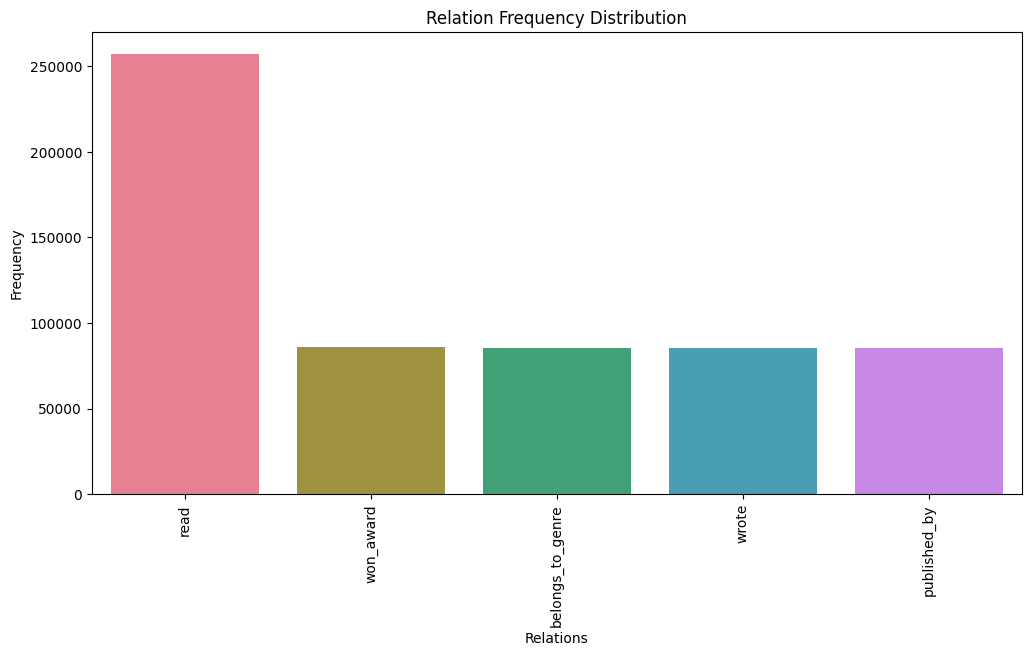

In [13]:
# Plot a bar chart showing the frequency distribution of different relations
plt.figure(figsize=(12,6))

# Use a color palette with a unique color for each bar
colors = sns.color_palette("husl", len(relation_counts))

sns.barplot(x=relation_counts.index, y=relation_counts.values, palette=colors)

# Adding labels and title
plt.title('Relation Frequency Distribution')
plt.xlabel('Relations')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Group the dataset by the 'relation' column and sample 2 records from each group
sampled_records = graph_details.groupby('relation').apply(lambda x: x.sample(2)).reset_index(drop=True)

# Display the resulting sample
print(sampled_records)

          head          relation           tail
0    book_4196  belongs_to_genre        genre_8
1    book_2225  belongs_to_genre       genre_18
2    book_3105      published_by  publisher_335
3    book_1450      published_by   publisher_56
4  reader_3958              read      book_3235
5  reader_2703              read      book_4417
6    book_3887         won_award       award_23
7    book_2942         won_award       award_77
8   author_606             wrote      book_3844
9   author_910             wrote      book_2712


C:\Users\EzhilPriyadharshiniK\AppData\Local\Temp\ipykernel_38688\3040764564.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_records = graph_details.groupby('relation').apply(lambda x: x.sample(2)).reset_index(drop=True)


## Entity Degree Distribution

In [15]:
# Calculate the degree (frequency) of each entity by combining 'head' and 'tail' columns
entity_degrees = pd.concat([graph_details['head'], graph_details['tail']]).value_counts()
entity_degrees

genre_3        4411
genre_19       4346
genre_10       4342
genre_8        4333
genre_13       4327
               ... 
reader_4337      30
reader_2547      30
reader_1479      29
reader_195       27
reader_721       23
Name: count, Length: 11570, dtype: int64

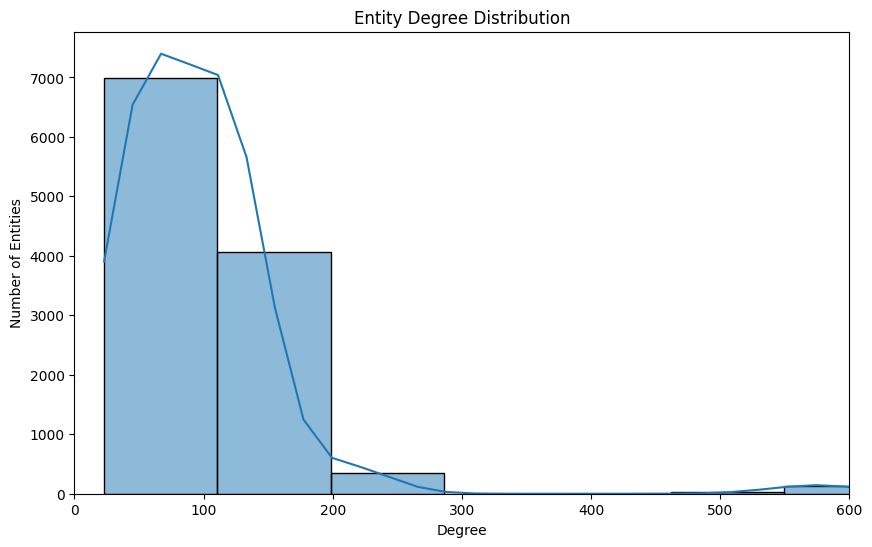

In [16]:
# Plot a histogram showing the distribution of entity degrees
# degree - denotes number of connections for each entity
plt.figure(figsize=(10,6))
sns.histplot(entity_degrees, bins=50, kde=True)
plt.title('Entity Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Entities')
# Set x-axis limits to range from 0 to 1000
plt.xlim(0, 600)
plt.show()

## c. Heatmap of Relations

Displays the relationship counts between "head" entities and different "relation" types in the dataset.  
Each cell represents the count of a particular relation type for a specific head entity.  
Darker colors (or higher values in the color scale) indicate more frequent connections between a given head entity and that specific relation.  
Cells with lighter colors (or lower values) indicate fewer occurrences of that relation type for the head entity.  

Useful to find the anomalies  
Also to find sparse versus dense relations.

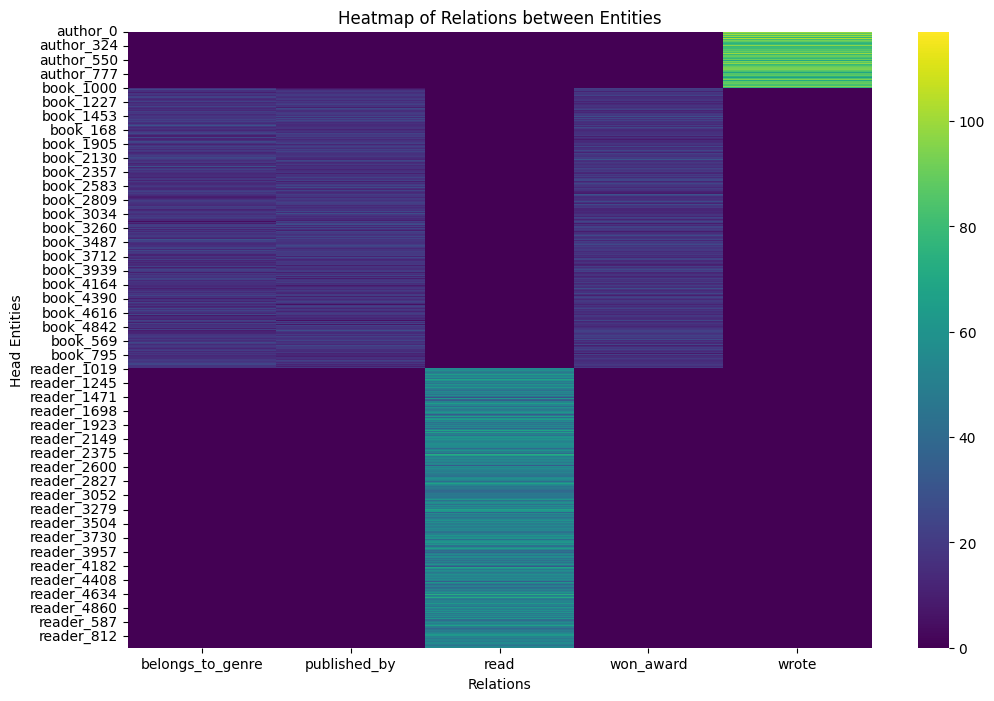

In [17]:
# Create and visualize a matrix showing relation counts between 'head' entities and relations
relation_matrix = graph_details.groupby(['head', 'relation']).size().unstack(fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(relation_matrix, cmap='viridis')
plt.title('Heatmap of Relations between Entities')
plt.xlabel('Relations')
plt.ylabel('Head Entities')
plt.show()

**Key observations:**  
- Books: Many book_ entities have frequent belongs_to_genre and published_by relations, as seen in the respective columns with colored intensity. This suggests that most books in the dataset are associated with genres and publishers.  
- Readers: There is a strong intensity in the read relation for many reader_ entities, implying that reading behavior is well-captured for many readers in this dataset.  
- Authors: Some author_ entities show a high intensity for the wrote and won_award relations, suggesting that certain authors have written many books and won multiple awards.  

## Part 4. Advanced analysis

### a. Analyze Specific Relations

In [18]:
# Count the top occurrences of head and tail entities for the specified relation
specific_relation = 'read'  # Replace with a relation from your dataset
relation_df = graph_details[graph_details['relation'] == specific_relation]

In [19]:
# Count the top occurrences of head and tail entities for the specified relation
head_counts = relation_df['head'].value_counts().head(10)
tail_counts = relation_df['tail'].value_counts().head(10)

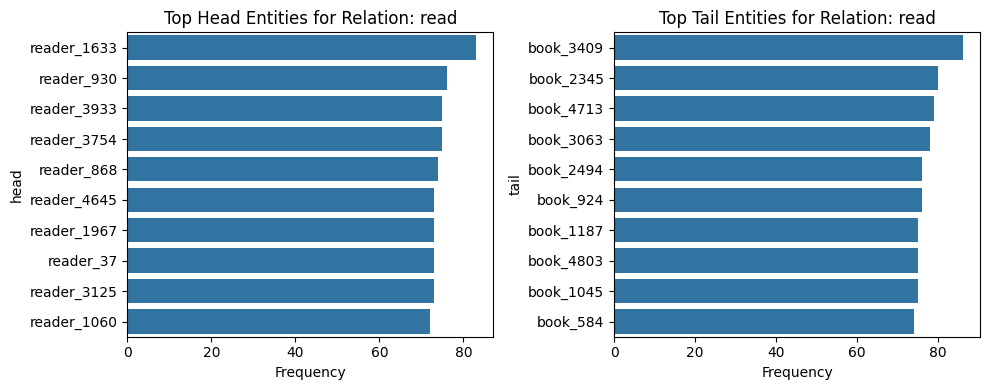

In [20]:
# Create side-by-side bar plots showing top head and tail entities for the specified relation
plt.figure(figsize=(10,4))

# Heads
plt.subplot(1,2,1)
sns.barplot(x=head_counts.values, y=head_counts.index)
plt.title(f'Top Head Entities for Relation: {specific_relation}')
plt.xlabel('Frequency')

# Tails
plt.subplot(1,2,2)
sns.barplot(x=tail_counts.values, y=tail_counts.index)
plt.title(f'Top Tail Entities for Relation: {specific_relation}')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

### b. Entity Co-occurrence Matrix

Co-occurence matrix will be used to understand the below,  
    - Analyzing relationships  
    - detect patterns  
    - Graph network analysis and its connections  
    - Detect anomalies  

In [21]:
# Generate a co-occurrence matrix for head and tail entities to analyze entity relationships
co_occurrence = pd.crosstab(graph_details['head'], graph_details['tail'])

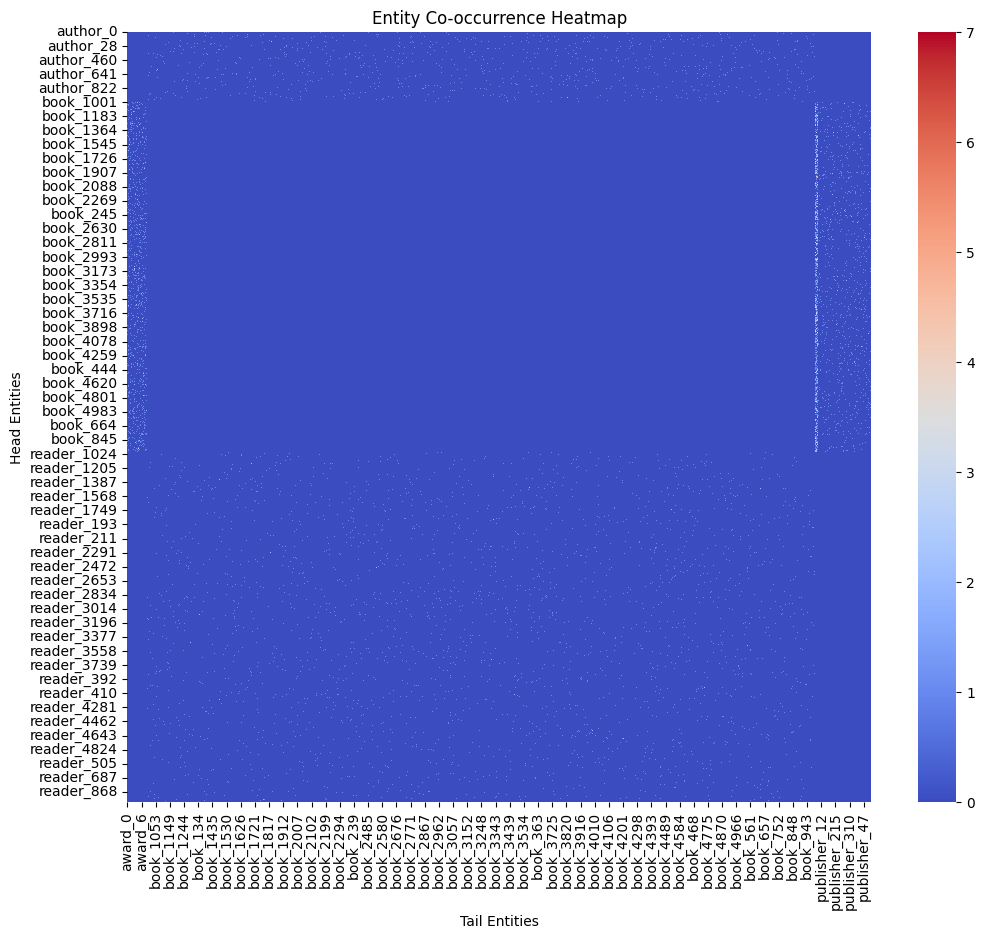

In [22]:
# Plot a heatmap for the entity co-occurrence matrix, showing relationships between entities
plt.figure(figsize=(12,10))
sns.heatmap(co_occurrence, cmap='coolwarm')
plt.title('Entity Co-occurrence Heatmap')
plt.xlabel('Tail Entities')
plt.ylabel('Head Entities')
plt.show()

The sparse matrix with only a few lighter areas suggests that most entities don't frequently interact, but certain books, readers, or publishers stand out due to their higher levels of interaction.

### c. Network Visualization

In [23]:
# Create a directed graph from the DataFrame using 'head' and 'tail' columns as nodes
import networkx as nx

# Create a directed graph
G = nx.from_pandas_edgelist(graph_details, 'head', 'tail', edge_attr=True, create_using=nx.DiGraph())

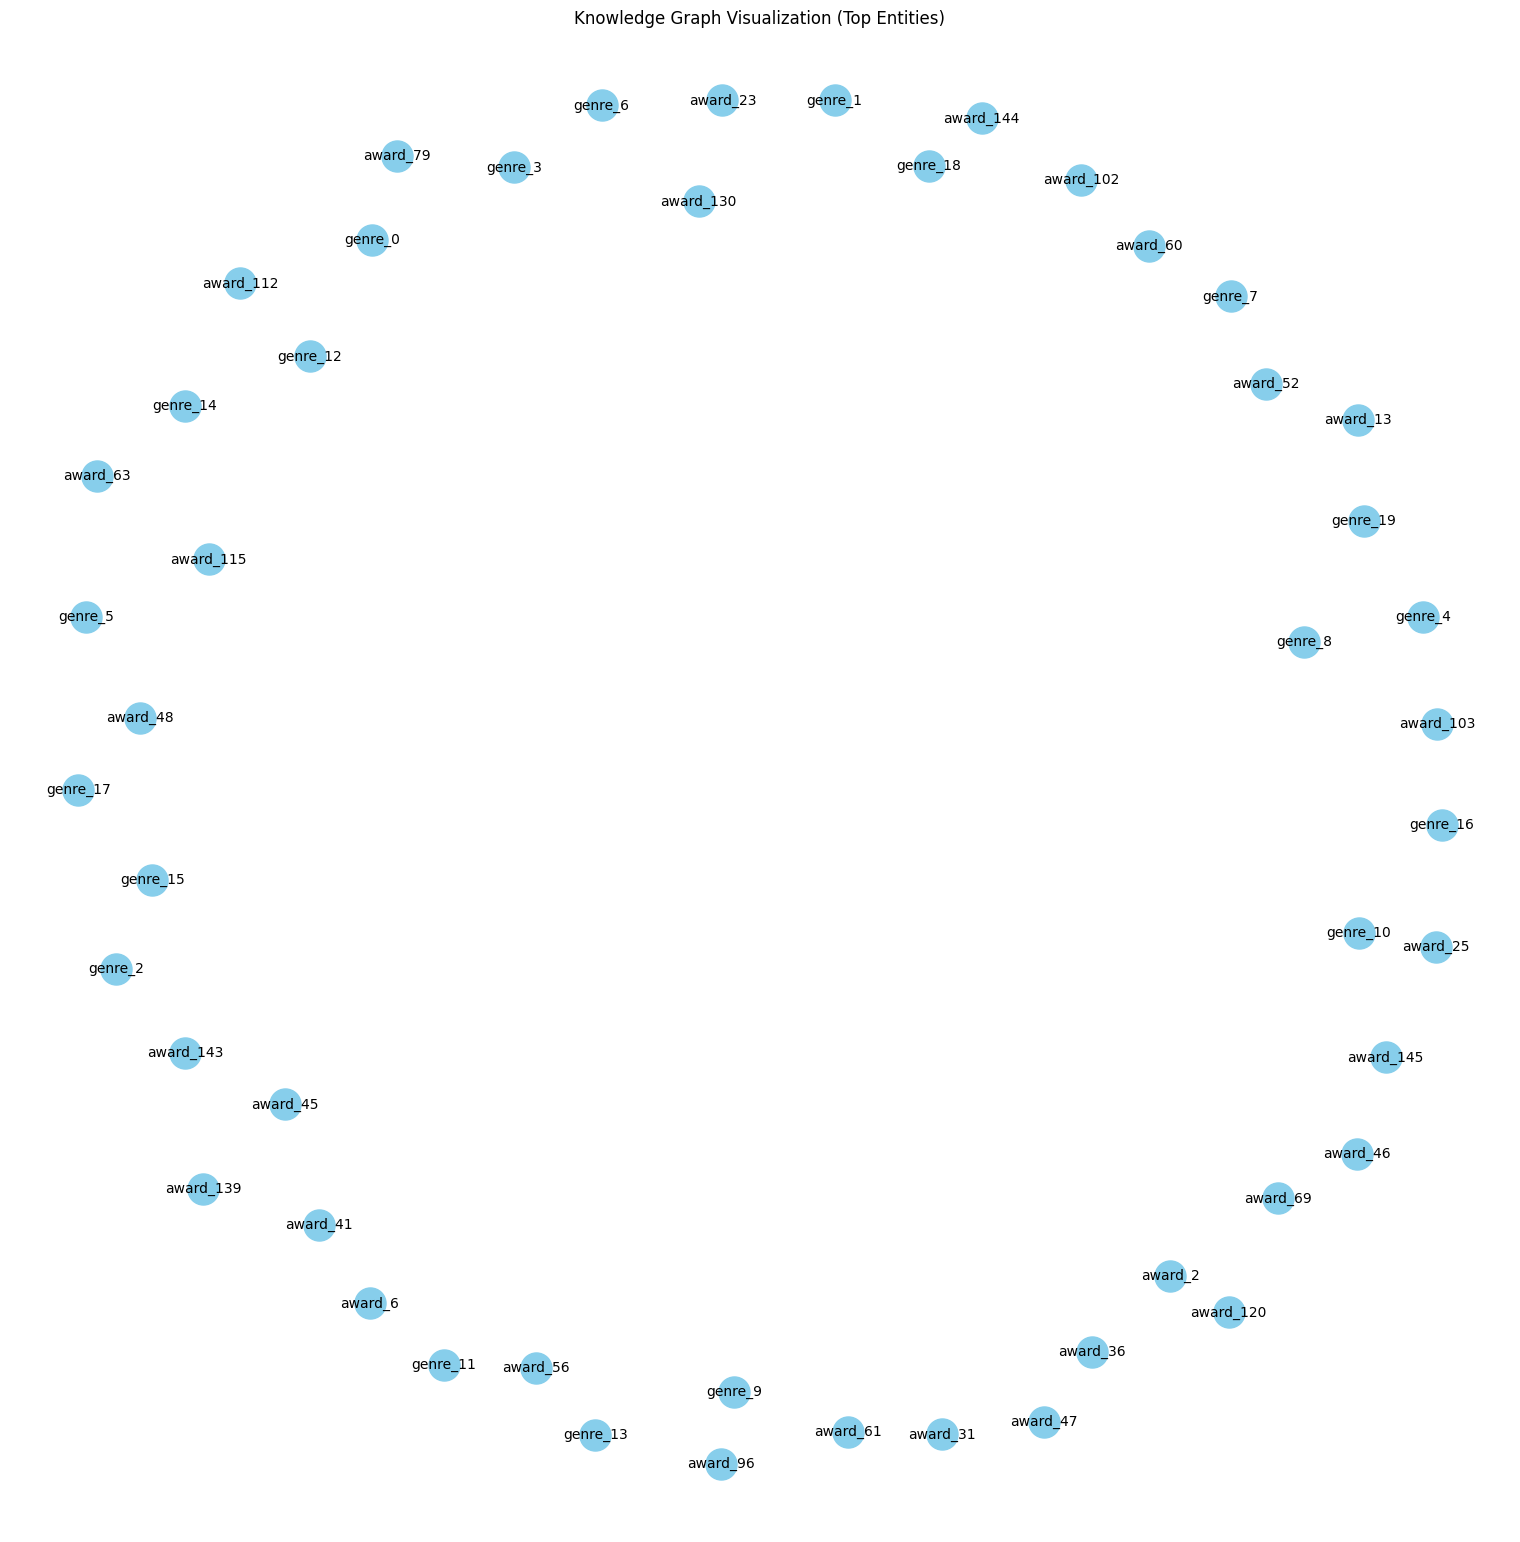

In [24]:
# Get the top N entities
top_entities = entity_degrees.head(50).index.tolist()
subgraph = G.subgraph(top_entities)

plt.figure(figsize=(15,15))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, edge_color='gray')
plt.title('Knowledge Graph Visualization (Top Entities)')
plt.show()

### d Statistical Analysis

Degree Centrality gives insight into the most connected and important nodes in the graph.
The below analysis will inform how the nodes are connected with each other.

In [25]:
degree_centrality = nx.degree_centrality(G)

In [26]:
import operator
sorted_centrality = sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_centrality[:10])

[('genre_3', 0.25430028524505144), ('genre_19', 0.25291727893508514), ('genre_12', 0.25170714841386466), ('genre_15', 0.25127495894200014), ('genre_13', 0.2504105799982712), ('genre_14', 0.24989195263203387), ('genre_1', 0.2496326389489152), ('genre_8', 0.2493733252657965), ('genre_16', 0.24920044947705072), ('genre_17', 0.24902757368830494)]


In [27]:
components = list(nx.strongly_connected_components(G))
print(f'Number of strongly connected components: {len(components)}')

Number of strongly connected components: 11570


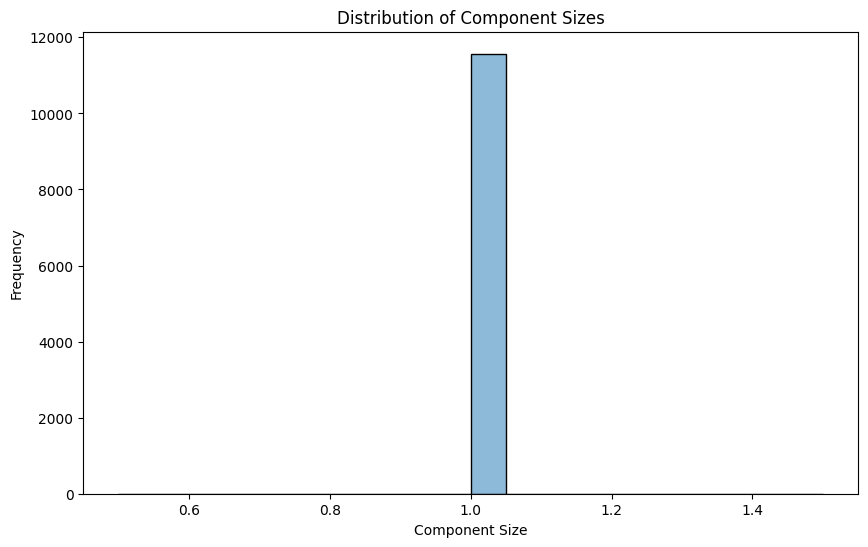

In [28]:
component_sizes = [len(c) for c in components]
plt.figure(figsize=(10,6))
sns.histplot(component_sizes, bins=20, kde=True)
plt.title('Distribution of Component Sizes')
plt.xlabel('Component Size')
plt.ylabel('Frequency')
plt.show()

The y-axis (frequency) indicates that there are over 11,000 components of size 1. This means that over 11,000 nodes in your graph are isolated, with no connections (edges) to other nodes. In other words, each node forms its own strongly connected component.  

**Isolated Nodes:** The graph is largely disconnected, with many nodes not having any relationships (edges) to other nodes. Each of these nodes forms its own component, which is why the component size is 1 for each.

### e. Data Quality checks

It counts the number of duplicate rows (triples) in the dataset, which might indicate repeated relationships or redundant data.

In [29]:
# Count the number of duplicate rows (triples) in the DataFrame
duplicate_count = graph_details.duplicated().sum()
print(f'Number of duplicate triples: {duplicate_count}')
unique_heads = graph_details['head'].unique()
unique_tails = graph_details['tail'].unique()

# Find entities that are present in one set (either head or tail) but not in both
inconsistent_entities = set(unique_heads).symmetric_difference(set(unique_tails))
print(f'Number of inconsistent entities: {len(inconsistent_entities)}')

Number of duplicate triples: 36705
Number of inconsistent entities: 6570
